# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [134]:
# Dependencies and Setup (in alphabetical order)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Imports Sample
from random import sample 

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
LAT_RANGE   = (-90, 90)
LNG_RANGE   = (-180, 180)
SEED        = 1982

## Generate Cities List

In [135]:
# List for holding lat_lngs and cities
cities   = []

# Create a set of random lat and lng combinations
np.random.seed(SEED)

lats = np.random.uniform(low = -90.000, 
                         high = 90.000, 
                         size = 1500)

lngs = np.random.uniform(low = -180.000, 
                         high = 180.000, 
                         size = 1500)

lat_lngs = zip(lats, lngs)

In [136]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], 
                               lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
if len(cities) < 500:
    print("You don't have enough cities in your sample, change the value of 'SEED'")
else: 
    print(f"Your sample has {len(cities)} observations")
    
type(cities[274])

Your sample has 605 observations


str

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [137]:
# Seting parameters to access the wheather data
## Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

## Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [138]:
city = "London"
response = requests.get(query_url + city).json()
type(response['name'])

str

In [139]:
# Setting up lists to hold reponse info
temperature_f   = []
humidity_perc   = []
cloudiness_perc = []
wind_speed_mph  = []
latitude        = []
longitude       = []
city_list      = []

# Loop through the list of cities and perform a request for data on each

for city in cities:
    
    try:
        print(f"Gethering information for {city}")
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature_f.append(response['main']['temp'])
        humidity_perc.append(response['main']['humidity'])
        cloudiness_perc.append(response['clouds']['all'])
        wind_speed_mph.append(response['wind']['speed'])
    
    except (KeyError, IndexError):
        print("City not found. Skipping.")
        
    print("------------")



Gethering information for katsuura
------------
Gethering information for narsaq
------------
Gethering information for faanui
------------
Gethering information for meulaboh
------------
Gethering information for rikitea
------------
Gethering information for taolanaro
City not found. Skipping.
------------
Gethering information for bredasdorp
------------
Gethering information for hithadhoo
------------
Gethering information for barrow
------------
Gethering information for cape town
------------
Gethering information for busselton
------------
Gethering information for basco
------------
Gethering information for puerto ayora
------------
Gethering information for san lorenzo
------------
Gethering information for bengkulu
City not found. Skipping.
------------
Gethering information for saint-philippe
------------
Gethering information for mananjary
------------
Gethering information for dunnville
------------
Gethering information for lompoc
------------
Gethering information for p

------------
Gethering information for nioro
------------
Gethering information for san rafael del sur
------------
Gethering information for leningradskiy
------------
Gethering information for sao joao da barra
------------
Gethering information for kutum
------------
Gethering information for salinopolis
------------
Gethering information for santa marta
------------
Gethering information for ottawa
------------
Gethering information for nicoya
------------
Gethering information for port lincoln
------------
Gethering information for potenza
------------
Gethering information for astana
------------
Gethering information for thinadhoo
------------
Gethering information for moundou
------------
Gethering information for rusne
------------
Gethering information for yellowknife
------------
Gethering information for imbituva
------------
Gethering information for taywarah
------------
Gethering information for athabasca
------------
Gethering information for qaanaaq
------------
Gether

------------
Gethering information for abu samrah
------------
Gethering information for kyshtovka
------------
Gethering information for ormara
------------
Gethering information for sihora
------------
Gethering information for shaunavon
------------
Gethering information for umm jarr
City not found. Skipping.
------------
Gethering information for ho chi minh city
------------
Gethering information for shelui
------------
Gethering information for khorixas
------------
Gethering information for tondano
------------
Gethering information for saint-joseph
------------
Gethering information for ust-barguzin
------------
Gethering information for mission
------------
Gethering information for tungor
------------
Gethering information for beringovskiy
------------
Gethering information for narasannapeta
------------
Gethering information for aquiraz
------------
Gethering information for sitka
------------
Gethering information for golden
------------
Gethering information for nizhneyans

------------
Gethering information for solnechnyy
------------
Gethering information for santa rosa del sur
------------
Gethering information for krasnoselkup
City not found. Skipping.
------------
Gethering information for tateyama
------------
Gethering information for lolua
City not found. Skipping.
------------
Gethering information for san-pedro
------------
Gethering information for camabatela
------------
Gethering information for loikaw
------------
Gethering information for jiutai
------------
Gethering information for hofn
------------
Gethering information for novyy svit
------------
Gethering information for grootfontein
------------
Gethering information for riyadh
------------
Gethering information for hvide sande
------------
Gethering information for nantucket
------------
Gethering information for brumadinho
------------
Gethering information for emba
------------
Gethering information for lixourion
------------
Gethering information for washington
------------
Gether

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [140]:
weather_dict = {
    "city"            : city_list,
    "temperature_f"   : temperature_f,
    "humidity_perc"   : humidity_perc,
    "cloudiness_perc" : cloudiness_perc,
    "wind_speed_mph"  : wind_speed_mph,
    "latitude"        : latitude,
    "longitude"       : longitude

}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,temperature_f,humidity_perc,cloudiness_perc,wind_speed_mph,latitude,longitude
0,Katsuura,78.30,88,75,1.12,33.93,134.50
1,Narsaq,42.47,87,100,4.38,60.91,-46.05
2,Faanui,79.19,78,64,19.60,-16.48,-151.75
3,Meulaboh,80.81,78,100,8.97,4.14,96.13
4,Rikitea,69.83,70,95,11.12,-23.12,-134.97


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

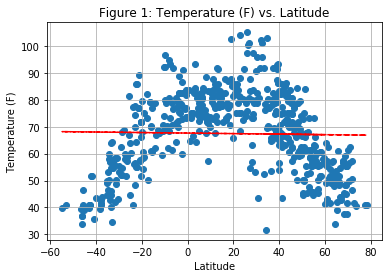

In [141]:
plt.scatter(weather_data['latitude'], 
            weather_data['temperature_f'], 
            marker = "o")


plt.grid(True)
plt.title("Figure 1: Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

reg_temperature = np.polyfit(weather_data['latitude'], 
                             weather_data['temperature_f'], 
                             1)

temperature_hat = np.poly1d(reg_temperature)

plt.plot(weather_data['latitude'],
         temperature_hat(weather_data['latitude']),
         "r--")

# Save the Figure
plt.savefig("../Images/temp.png")
plt.show()

#### Latitude vs. Humidity Plot

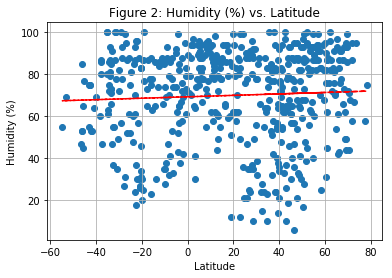

In [142]:
plt.scatter(weather_data['latitude'], 
            weather_data['humidity_perc'], 
            marker = "o")


plt.grid(True)
plt.title("Figure 2: Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


reg_humidity = np.polyfit(weather_data['latitude'], 
                          weather_data['humidity_perc'], 
                          1)

humidity_hat = np.poly1d(reg_humidity)

plt.plot(weather_data['latitude'],
         humidity_hat(weather_data['latitude']),
         "r--")


# Save the Figure
plt.savefig("../Images/humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

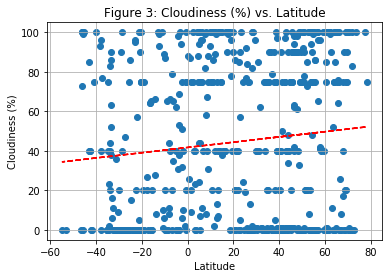

In [143]:
plt.scatter(weather_data['latitude'], 
            weather_data['cloudiness_perc'], 
            marker = "o")


plt.grid(True)
plt.title("Figure 3: Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

reg_cloud = np.polyfit(weather_data['latitude'], 
                       weather_data['cloudiness_perc'], 
                       1)

cloudiness_hat = np.poly1d(reg_cloud)
plt.plot(weather_data['latitude'],
         cloudiness_hat(weather_data['latitude']),
         "r--")

# Save the Figure
plt.savefig("../Images/cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

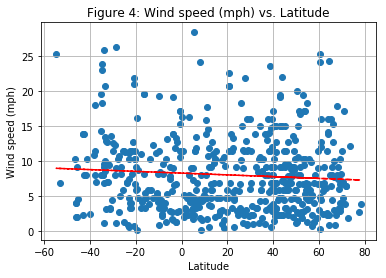

In [144]:
plt.scatter(weather_data['latitude'], 
            weather_data['wind_speed_mph'], 
            marker = "o")


plt.grid(True)
plt.title("Figure 4: Wind speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")

reg_wind_speed = np.polyfit(weather_data['latitude'], 
                            weather_data['wind_speed_mph'], 
                            1)

reg_wind_hat = np.poly1d(reg_wind_speed)

plt.plot(weather_data['latitude'], 
         reg_wind_hat(weather_data['latitude']),
         "r--")


# Save the Figure
plt.savefig("../Images/wind.png")
plt.show()

## Conclusions

* Figure 1 indicates that the temperature (in F) increases as the latitude approximates 0 (i.e., the Ecuador). Notice that this holds true, regardless of the direction in which 0 is being approximated (i.e. approximating the Ecuador from the North or the Sound Pole), thus he hyperbolic pattern observed.

* Humidity and Cloudintes (both in %) seem to be slightly more prevalent in the Northern Hemisphere (see Figure 2 and Figure 3)

* From Figure 4 we can infere the the Southern Hemisphere experiences slightly higher wind speeds  
